## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

import sys
import os


from sklearn.preprocessing import StandardScaler

#import kmeans 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle as pkl

sys.path.append(os.path.abspath(".."))
from src.utils import *


## Load the Data

In [2]:
config = read_config()
purchase_path = os.path.join(os.getcwd(),"..","Data" ,config["filenames"]["purchase_data"])
df = pd.read_csv(purchase_path, index_col=0)
df.head()


c:\Users\satwik.boina\Documents\git_clones\CustomerAnalytics\src\..


,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
df.isnull().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

Descriptive analysis would not make sense for day wise data.

## Segmentation

In [4]:
# Import the segmentation model
scaler = load_pickle_object(filename= "scaler",folder = 'artifacts')
pca = load_pickle_object(filename = "pca")
kmeans_pca = load_pickle_object(filename = "Kmeans_pca")

### Transform using the above trained entities

In [5]:
features = df.loc[:,df.columns[-7:]]
features



,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...
200000500,0,0,42,1,120946,1,0
200000500,0,0,42,1,120946,1,0
200000500,0,0,42,1,120946,1,0


### Standardization

In [6]:
df_standardized = scaler.transform(features)
df_standardized

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]],
      shape=(58693, 7))

### Dimensionality Reduction

In [7]:
df_pca = pca.transform(df_standardized)
df_pca

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]], shape=(58693, 3))

### Segmentation

In [8]:
df_segmented = kmeans_pca.predict(df_pca)
df["Segment"] = df_segmented

## Descriptive Analysis using Segments

In [9]:
df = df.reset_index()
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [10]:
# No of visits : count of incidence
temp1 = df[["ID","Incidence"]].groupby('ID',as_index = False).count()
temp1.rename(columns = {"Incidence":"N_visits"},inplace = True)
temp1

# No of purchases : sum of incidence
temp2 = df[["ID","Incidence"]].groupby('ID',as_index = False).sum()
temp2.rename(columns = {"Incidence":"N_purchases"},inplace = True)
temp2

# Average purchases : no of purchases/no of visits
temp3 = temp1.merge(temp2,on = ['ID'],how = 'left')
temp3['Average_N_purchases'] = temp3["N_purchases"].div(temp3['N_visits'])
temp3

,ID,N_visits,N_purchases,Average_N_purchases
0,200000001,101,9,0.089109
1,200000002,87,11,0.126437
2,200000003,97,10,0.103093
3,200000004,85,11,0.129412
4,200000005,111,13,0.117117
...,...,...,...,...
495,200000496,120,20,0.166667
496,200000497,120,43,0.358333
497,200000498,131,39,0.297710
498,200000499,106,31,0.292453


In [11]:
temp4 = df[["ID","Segment"]].drop_duplicates()
#temp4.rename(columns = {"Incidence":"N_purchases"},inplace = True)
df_descriptive = temp3.merge(temp4,on = 'ID',how = 'left')
df_descriptive

,ID,N_visits,N_purchases,Average_N_purchases,Segment
0,200000001,101,9,0.089109,0
1,200000002,87,11,0.126437,3
2,200000003,97,10,0.103093,0
3,200000004,85,11,0.129412,1
4,200000005,111,13,0.117117,0
...,...,...,...,...,...
495,200000496,120,20,0.166667,1
496,200000497,120,43,0.358333,1
497,200000498,131,39,0.297710,2
498,200000499,106,31,0.292453,1


In [12]:
segment_prop = df_descriptive.groupby('Segment')["ID"].nunique()/df['ID'].nunique()
segment_prop = segment_prop.reset_index()
segment_prop.rename(columns={'ID':"proportions"},inplace=1)

segment_prop["Segment_Description"]=segment_prop["Segment"].map({0:"Standard",1:"Career Focussed",2:"fewer opportuinities",3:"well-off"})
segment_prop

,Segment,proportions,Segment_Description
0,0,0.290,Standard
1,1,0.362,Career Focussed
2,2,0.152,fewer opportuinities
3,3,0.196,well-off


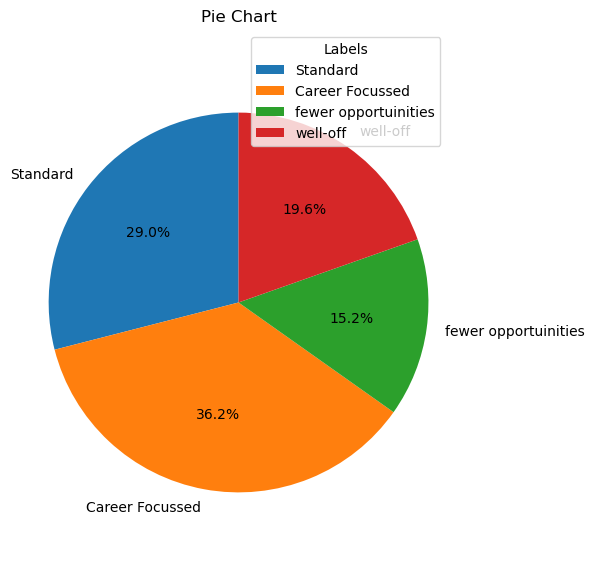

In [13]:
plot_pie_chart(values = segment_prop['proportions'],labels = segment_prop['Segment_Description'])

## Purchase Ocassion and Purchase Incidence

In [14]:
df_descriptive.drop(['ID'],axis = 1,inplace=True)

In [15]:
segments_mean = df_descriptive.groupby('Segment').mean()
segments_std = df_descriptive.groupby('Segment').std()
segments_std

,N_visits,N_purchases,Average_N_purchases
Segment,,,
0,39.398448,47.564198,0.181261
1,17.762052,13.851663,0.120124
2,19.834239,19.495222,0.146761
3,20.840775,25.997160,0.172682


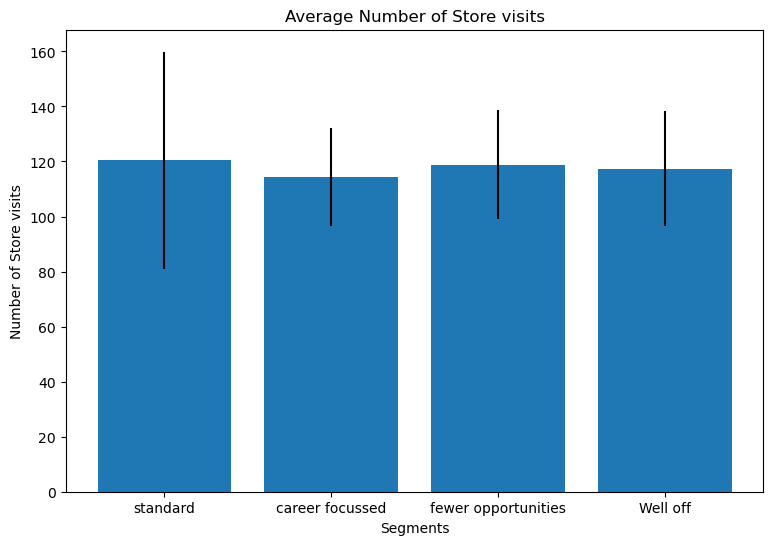

In [16]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
        tick_label =("standard","career focussed","fewer opportunities","Well off") ,
        height = segments_mean['N_visits'],
        yerr = segments_std['N_visits'],
        
        )
plt.xlabel("Segments")
plt.ylabel("Number of Store visits")
plt.title("Average Number of Store visits")
plt.show()

- career focussed, well off and fewer opportunities sections are identical in terms of average number of visits.
- standard segment is more diverse  

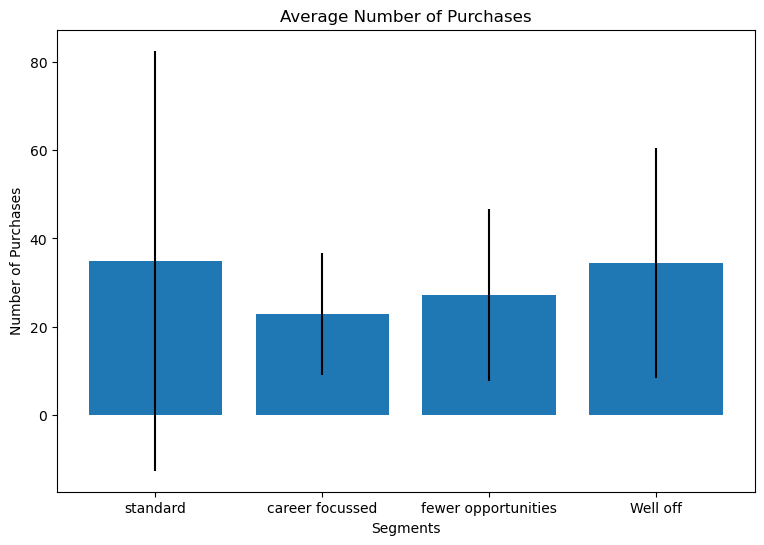

In [17]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
        tick_label =("standard","career focussed","fewer opportunities","Well off") ,
        height = segments_mean['N_purchases'],
        yerr = segments_std['N_purchases'],
        
        )
plt.xlabel("Segments")
plt.ylabel("Number of Purchases")
plt.title("Average Number of Purchases")
plt.show()

- Standard segment is more diverse in terms of purchases


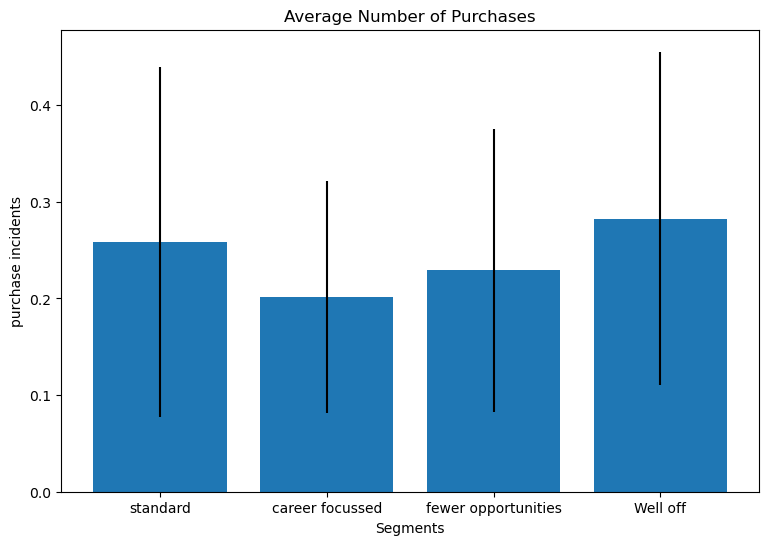

In [18]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
        tick_label =("standard","career focussed","fewer opportunities","Well off") ,
        height = segments_mean['Average_N_purchases'],
        yerr = segments_std['Average_N_purchases'],
        
        )
plt.xlabel("Segments")
plt.ylabel("purchase incidents")
plt.title("Average Number of Purchases")
plt.show()

### BRAND CHOICE

In [19]:
df_purchase_incidence = df.loc[df['Incidence']==1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [20]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix = 'Brand',prefix_sep="_")
brand_dummies['Segment'],brand_dummies['ID'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,0,200000500
58648,True,False,False,False,False,0,200000500
58674,False,True,False,False,False,0,200000500
58687,False,True,False,False,False,0,200000500


In [21]:
brand_dummies = brand_dummies.groupby(['Segment','ID'],as_index=False).mean()
brand_dummies = brand_dummies.groupby(['Segment'],as_index=False).mean()
brand_dummies.drop(columns = 'ID',inplace= True)
brand_dummies = brand_dummies.set_index(keys = "Segment")

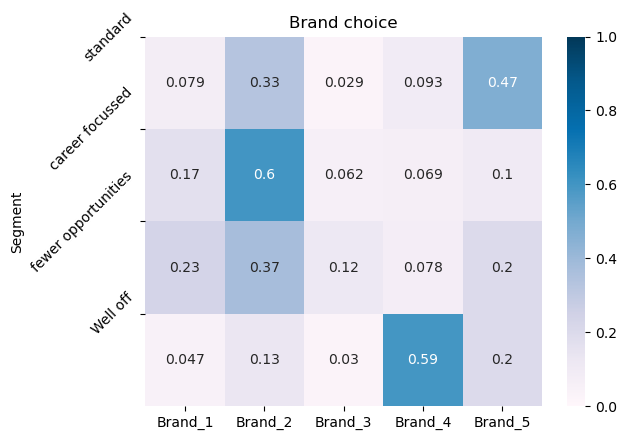

In [22]:
sns.heatmap(data = brand_dummies, vmin =0,vmax=1,cmap="PuBu",annot = True)
plt.yticks([0,1,2,3],["standard","career focussed","fewer opportunities","Well off"],rotation = 45)
plt.title("Brand choice")
plt.show()

## Revenue

In [23]:
brand_revenue = pd.DataFrame()
for brand in df_purchase_incidence['Brand'].unique():
    temp = df_purchase_incidence.loc[df_purchase_incidence['Brand']==brand]
    temp[f"Brand Revenue {brand}"] = temp['Price_1']*temp['Quantity']
    if brand_revenue.isEmpty():
        brand_revenue = temp
    else:
        brand_revenue = pd.merge([brand_revenue,temp.groupby('Segment',as_index = False)[f'Brand Revenue {brand}'].sum()],on = "Segment")

brand_revenue



C:\Users\satwik.boina\AppData\Local\Temp\ipykernel_15408\3016560784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f"Brand Revenue {brand}"] = temp['Price_1']*temp['Quantity']


AttributeError: 'DataFrame' object has no attribute 'isEmpty'